[View in Colaboratory](https://colab.research.google.com/github/scumabo/DeepLearningFromScratch/blob/master/2_Logistic_regression.ipynb)

## Logistic regression on predicting high-cost blocks in california. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LinearRegression
%matplotlib inline


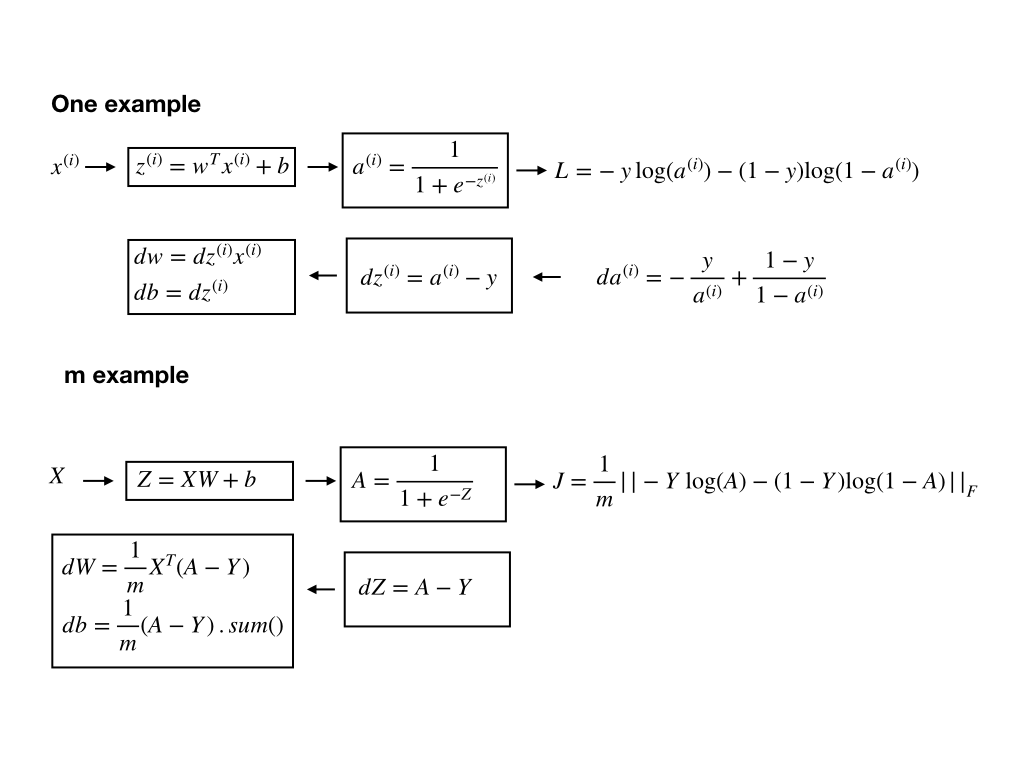

In [2]:
from IPython.display import Image
Image('Logistic.001.png')

In [3]:
data = pd.read_csv('california_housing_train.csv', header=0).values
X = data[:, 0:-1]
Y = data[:, [-1]]

# Standardize the data
X = (X - np.mean(X)) / np.std(X)

Y_logi = np.zeros((Y.shape))
Y_logi[Y > 265000] = 1 # Define high-cost block

X_train = X[0:12000, :]
X_test  = X[12000:, :]

Y_train = Y_logi[0:12000, :]
Y_test  = Y_logi[12000:, :]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12000, 8)
(5000, 8)
(12000, 1)
(5000, 1)


In [0]:
def initialize_parameters(n):
    """
    Argument:
    n -- number of features (dimensions)
    
    Returns:
    parameters -- dictionary containing:
                w -- weight matrix (n, 1)
                b -- bias (scalar)
    """
    np.random.seed(1)
    
    w = np.random.randn(n, 1) * 0.01
    b = 0
    
    parameters = {"w" : w,
                  "b" : b}
    
    return parameters

In [0]:
def forward_prop(X, parameters):
    """
    Argument:
    X -- data (m, n)
    parameters -- w and b
    
    Returns:
    A -- output of the linear+activation unit
    """
    w = parameters["w"]
    b = parameters["b"]
    
    Z = np.dot(X, w) + b
    
    A = 1 / (1 + np.exp(-Z))
    
    assert(A.shape == (X.shape[0], 1))
    
    return A

In [0]:
def cross_entropy_cost(A, Y):
    """
    Argument:
    A --     predict values (m, 1)
    Y --     true values (m, 1)
    
    Returns:
    l2 (MSE) cost
    """
    m = Y.shape[0]
    return (-Y*np.log(A) - (1-Y)*np.log(1-A)).sum()/m

In [0]:
def backward_prop(X, Y, A):
    """
    Argument:
    X -- data (m, n)
    Y -- true values (m, 1)
    A -- predict values (m, 1)
    """
    
    m = Y.shape[0]
    
    dZ = A - Y
    dw = np.dot(X.T, dZ)/m
    db = np.mean(dZ, keepdims = True)
    
    assert(dw.shape == (X.shape[1], 1))
    assert(db.shape == (1, 1))
    
    return dw, db

In [0]:
def update_parameters(parameters, dw, db, learning_rate):
    """
    Argument:
    parameters -- w and b
    
    Return:
    parameters
    """
    parameters["w"] = parameters["w"] - learning_rate * dw
    parameters["b"] = parameters["b"] - learning_rate * db
    
    return parameters

In [0]:
def logistic_regression_model(X, Y, learning_rate = 0.0075, num_iterations = 1000, print_cost = False):
    
    np.random.seed(1)
    (m, n) = (X.shape[0], X.shape[1])
    costs = []
    
    parameters = initialize_parameters(n)
    
    for i in range(num_iterations):
        A = forward_prop(X, parameters)
        cost = cross_entropy_cost(A, Y)
        dw, db = backward_prop(X, Y, A)
        parameters = update_parameters(parameters, dw, db, learning_rate)
        
        if print_cost and i % 10 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            
        costs.append(cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters

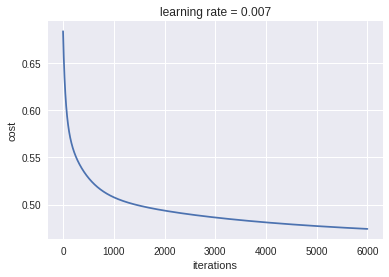

In [10]:
parameters = logistic_regression_model(X_train, Y_train, learning_rate = 0.007, num_iterations = 6000, print_cost = False)

In [0]:
def predict(X, parameters):
    """
    Arguments:
    W -- the learned weight matrix (num_feature, num_class)
    b -- the learned bias   matrix (1, num_class)
    X -- input data (m, num_feature)
    
    Return:
    prediction -- softmax vector (1, num_feature)
    """
    A = forward_prop(X, parameters)
    
    prediction = np.zeros((A.shape))
    prediction[A > 0.5] = 1
    
    return prediction

In [12]:
# Training accuracy
prediction = predict(X_train, parameters)

m = X_train.shape[0]
num_correct = m - np.count_nonzero(Y_train - prediction)

print("Training accuracy: %f" % float(num_correct / m * 100.0) + "%" )

Training accuracy: 78.416667%


In [13]:
prediction = predict(X_test, parameters)

m = X_test.shape[0]
num_correct = m - np.count_nonzero(Y_test - prediction)

print("Testing accuracy: %f" % float(num_correct / m * 100.0) + "%" )

Testing accuracy: 66.300000%
